## Import Libraries

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

## Load the raw dataset

In [64]:
df = pd.read_csv('Product Visibility Challenge Data.csv', header=1)

## Inspect: Shape, first rows, nulls, blanks

In [66]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (1500, 38)


In [68]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   S/N  Latitude  Longitude Type of Outlet Specify type of outlet  \
0    1  6.634719   3.255957           Shop                    NaN   
1    2  6.637297   3.257817           Shop                    NaN   
2    3  6.639850   3.284733           Shop                    NaN   
3    4  6.657487   3.291203           Shop                    NaN   
4    5  6.657487   3.291203           Shop                    NaN   

  Type of Product (Combined Response)  Coca-Cola  Pepsi  Bigi  RC Cola  ...  \
0          Pepsi Sprite American Cola          0      1     0        0  ...   
1                              Others          0      0     0        0  ...   
2                              Others          0      0     0        0  ...   
3                     Coca-Cola Fanta          1      0     0        0  ...   
4                     Coca-Cola Fanta          1      0     0        0  ...   

   Product Display - Others            Package Type Combined  \
0                       NaN    

In [70]:
print("\nData types and non-null counts:")
print(df.info())


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 38 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   S/N                                                       1500 non-null   int64  
 1   Latitude                                                  1500 non-null   float64
 2   Longitude                                                 1500 non-null   float64
 3   Type of Outlet                                            1500 non-null   object 
 4   Specify type of outlet                                    31 non-null     object 
 5   Type of Product (Combined Response)                       1500 non-null   object 
 6   Coca-Cola                                                 1500 non-null   int64  
 7   Pepsi                                                     1500 non-null 

In [72]:
print("\nNull values per column:")
print(df.isnull().sum())


Null values per column:
S/N                                                            0
Latitude                                                       0
Longitude                                                      0
Type of Outlet                                                 0
Specify type of outlet                                      1469
Type of Product (Combined Response)                            0
Coca-Cola                                                      0
Pepsi                                                          0
Bigi                                                           0
RC Cola                                                        0
7Up                                                            0
Fanta                                                          0
Sprite                                                         0
La Casera                                                      0
Schweppes                                                      0


## Handle Missing Values (Nulls)

In [74]:
if 'S/N' in df.columns:
    df = df.drop(columns=['S/N'])

In [76]:
# Select all number columns and fill with 0
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(0)

In [78]:
# Select all text columns and fill with 'Not Specified'
text_cols = df.select_dtypes(include=['object']).columns
df[text_cols] = df[text_cols].fillna('Not Specified')

In [80]:
# 3. specific cleanup for the binary column to ensure it's an integer
if 'With consumer (actively being consumed)' in df.columns:
    df['With consumer (actively being consumed)'] = df['With consumer (actively being consumed)'].astype(int)

In [82]:
# Check if there are any nulls left
print("\nMissing Values Count after Cleaning:")
print(df.isnull().sum().sum())


Missing Values Count after Cleaning:
0


## Visualization

C:\Users\hamad\AppData\Local\Temp\ipykernel_8088\3088422069.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')


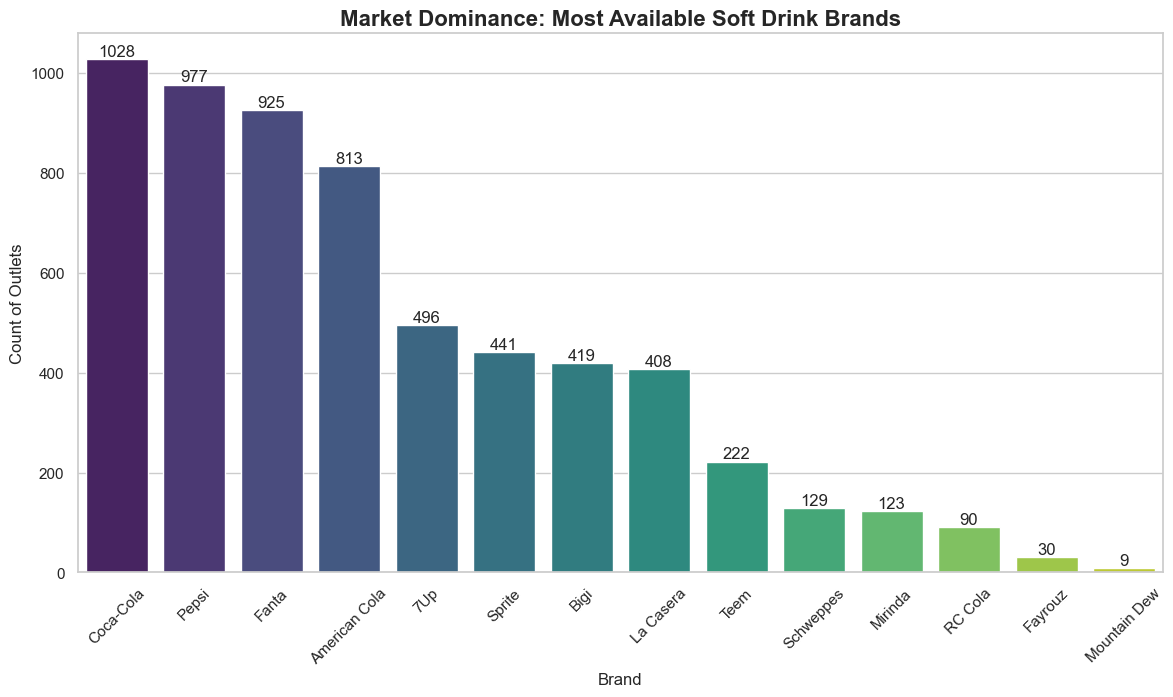

<Figure size 640x480 with 0 Axes>

In [111]:
# --- Chart 1: Brand Dominance (Who owns the market?) ---
brand_cols = ['Coca-Cola', 'Pepsi', 'Bigi', 'RC Cola', '7Up', 'Fanta', 'Sprite', 
              'La Casera', 'Schweppes', 'Fayrouz', 'Mirinda', 'Mountain Dew', 
              'Teem', 'American Cola']

# Summing up the availability
brand_counts = df[brand_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.title('Market Dominance: Most Available Soft Drink Brands', fontsize=16, fontweight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Count of Outlets', fontsize=12)
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()
plt.savefig("brand_chart.png")

C:\Users\hamad\AppData\Local\Temp\ipykernel_8088\2737562671.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=outlet_counts.index, y=outlet_counts.values, palette='magma')


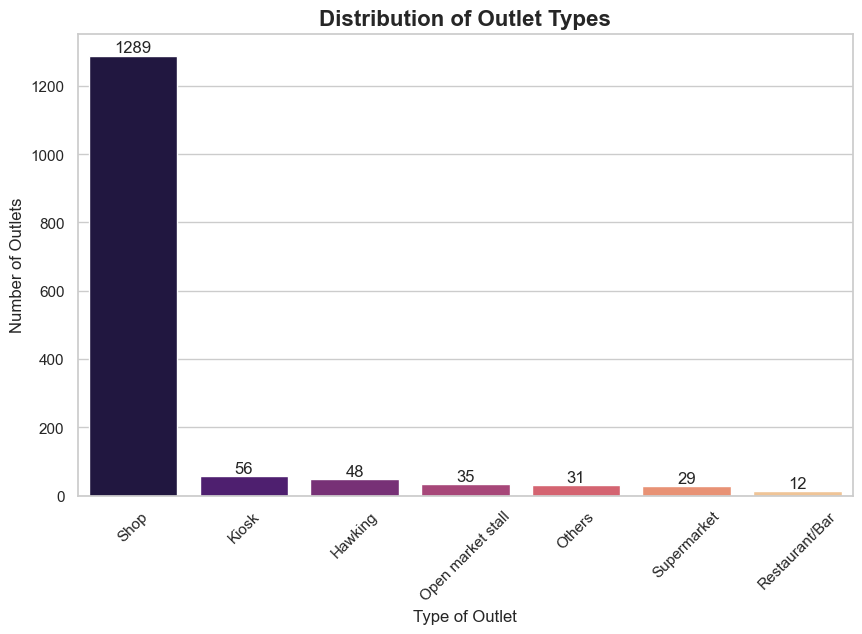

<Figure size 640x480 with 0 Axes>

In [113]:
# --- Chart 2: Outlet Distribution (Where are drinks sold?) ---
plt.figure(figsize=(10, 6))
outlet_counts = df['Type of Outlet'].value_counts()
ax = sns.barplot(x=outlet_counts.index, y=outlet_counts.values, palette='magma')
plt.title('Distribution of Outlet Types', fontsize=16, fontweight='bold')
plt.ylabel('Number of Outlets')
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

C:\Users\hamad\AppData\Local\Temp\ipykernel_8088\2558676448.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=package_counts.index, y=package_counts.values, palette='coolwarm')


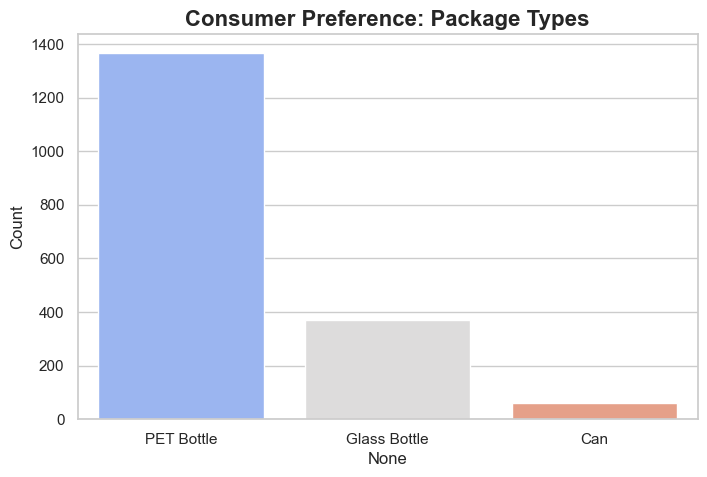

In [91]:
# --- Chart 3: Package Preference (Bottles vs Cans) ---
package_cols = {'PET bottle (50cl/1L)': 'PET Bottle', 
                'Glass bottle (35cl/60cl)': 'Glass Bottle', 
                'Can (33cl)': 'Can'}
# Note: We select only these columns to sum
package_df = df[list(package_cols.keys())].rename(columns=package_cols)
package_counts = package_df.sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=package_counts.index, y=package_counts.values, palette='coolwarm')
plt.title('Consumer Preference: Package Types', fontsize=16, fontweight='bold')
plt.ylabel('Count')
plt.show()

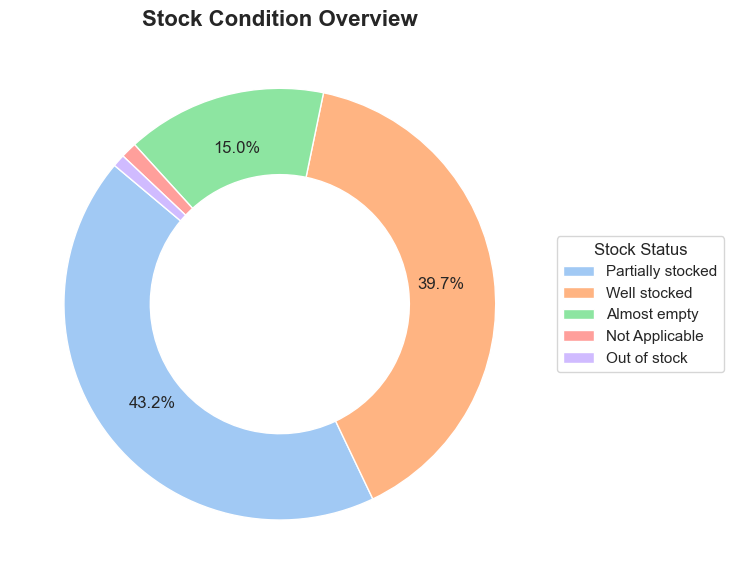

In [107]:
# --- Chart 4: FIXED Stock Condition (Clean Legend) ---
plt.figure(figsize=(10, 6))
stock_counts = df['Stock condition'].value_counts()
def clean_autopct(pct):
    return f'{pct:.1f}%' if pct > 3 else ''
wedges, texts, autotexts = plt.pie(
    stock_counts, 
    labels=None, # Turn off default labels to avoid congestion
    autopct=clean_autopct, 
    startangle=140, 
    colors=sns.color_palette('pastel'), 
    wedgeprops={'width': 0.4},
    pctdistance=0.75
)
# Add the Legend to the side
plt.legend(wedges, stock_counts.index,
           title="Stock Status",
           loc="center left",
           bbox_to_anchor=(1, 0.5))
plt.title('Stock Condition Overview', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


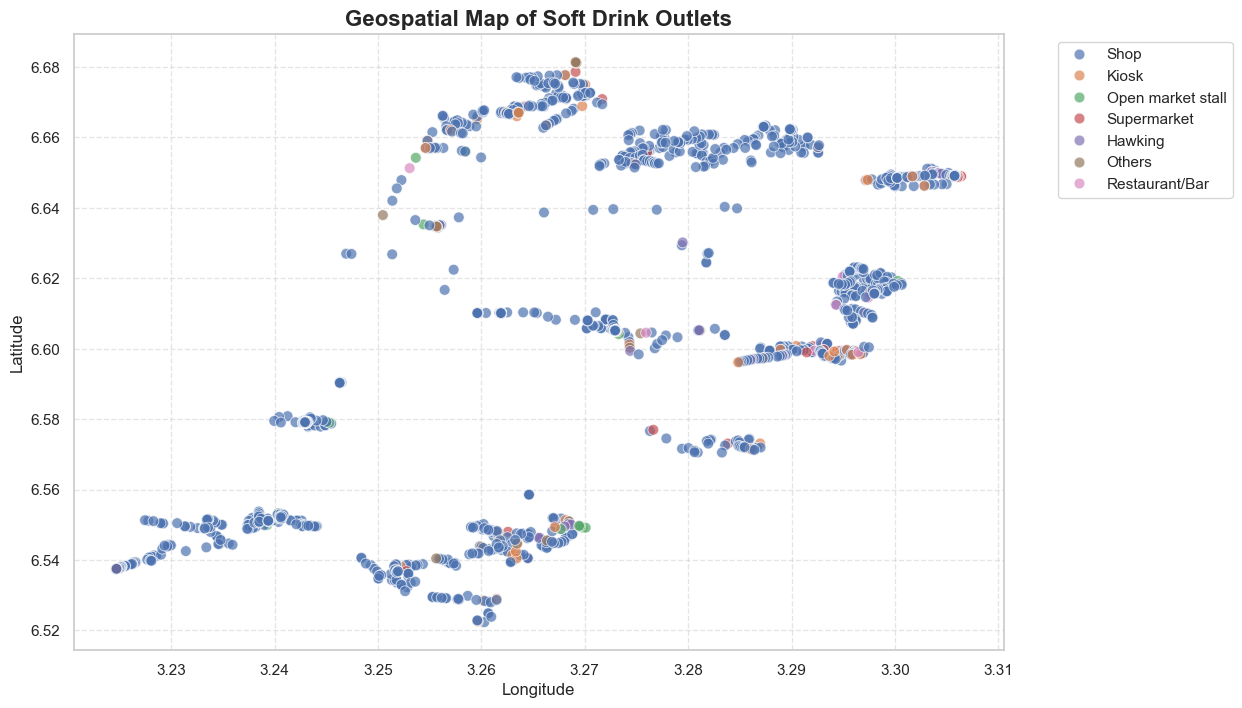

In [109]:
# --- Chart 5: Geospatial Map ---
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Type of Outlet', 
                alpha=0.7, s=60, palette='deep')
plt.title('Geospatial Map of Soft Drink Outlets', fontsize=16, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [3]:
from PIL import Image, ImageDraw, ImageFont, ImageOps
import numpy as np

def trim_white_borders(im):
    """
    Automatically crops the white borders from an image 
    so the chart content is larger.
    """
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)
    return im

from PIL import ImageChops

# 1. Load and Clean Images
files = {
    "brand": "Brand.png",
    "outlet": "Outlet.png",
    "package": "Package.png",
    "stock": "Stock.png",
    "map": "Map.png"
}

loaded_imgs = {}
widths = []
heights = []

print("Processing images...")
for key, filename in files.items():
    try:
        img = Image.open(filename)
        # Trim whitespace to maximize chart visibility
        img = trim_white_borders(img)
        loaded_imgs[key] = img
        widths.append(img.width)
        heights.append(img.height)
    except Exception as e:
        print(f"Could not load {filename}: {e}")

if not loaded_imgs:
    raise Exception("No images found! Make sure you uploaded Brand.png, Map.png, etc.")

# 2. Determine Optimal Canvas Size
# Instead of forcing 4K, we base it on the average image size to keep text readable.
avg_width = int(sum(widths) / len(widths))
# We want a layout of 2 columns. So Canvas Width ~ 2.2 * Average Image Width
canvas_w = int(avg_width * 2.5) 
# Height will be calculated dynamically: Header + Row 1 + Row 2 + Row 3
padding = 50
header_h = 200

# Row Heights (approximate based on aspect ratios)
# Row 1 (Brand) is usually wide. Let's allocate 60% of canvas width for aspect ratio
row1_h = int(loaded_imgs['brand'].height * (canvas_w / loaded_imgs['brand'].width)) 
if row1_h > 800: row1_h = 800 # Cap max height

# Rows 2 & 3 (Grid)
row2_h = int(loaded_imgs['map'].height * 1.2) 
row3_h = int(loaded_imgs['stock'].height * 1.2)

canvas_h = header_h + row1_h + row2_h + row3_h + (padding * 5)

# Create Canvas
dashboard = Image.new('RGB', (canvas_w, canvas_h), (250, 250, 250))
draw = ImageDraw.Draw(dashboard)

# 3. Add Header
draw.rectangle([(0, 0), (canvas_w, header_h)], fill="#1a1a1a") # Dark professional header
try:
    font_size = int(canvas_w * 0.035) # Dynamic font size
    font = ImageFont.truetype("DejaVuSans-Bold.ttf", font_size)
    sub_font = ImageFont.truetype("DejaVuSans.ttf", int(font_size/2))
except:
    font = ImageFont.load_default()
    sub_font = ImageFont.load_default()

title = "ALIMOSHO MARKET INSIGHTS DASHBOARD"
draw.text((padding, header_h//3), title, fill="white", font=font)
draw.text((padding, header_h//3 + font_size + 10), "Data Analysis of 1,500 Outlets | 2025 Challenge", fill="#dddddd", font=sub_font)

# 4. Helper to Place Images
def place_image(key, x, y, target_w, target_h):
    if key not in loaded_imgs: return
    img = loaded_imgs[key]
    
    # Resize to fit the box, preserving aspect ratio using contain
    img_ratio = img.width / img.height
    target_ratio = target_w / target_h
    
    if img_ratio > target_ratio:
        # Image is wider than slot -> Fit to width
        new_w = target_w
        new_h = int(target_w / img_ratio)
    else:
        # Image is taller than slot -> Fit to height
        new_h = target_h
        new_w = int(target_h * img_ratio)
        
    img_resized = img.resize((new_w, new_h), Image.Resampling.LANCZOS)
    
    # Center in slot
    px = x + (target_w - new_w) // 2
    py = y + (target_h - new_h) // 2
    
    # Draw card background (White box with shadow effect)
    draw.rectangle([x-10, y-10, x+target_w+10, y+target_h+10], fill="white", outline="#dcdcdc", width=2)
    dashboard.paste(img_resized, (px, py))

# 5. Layout Execution
# Dimensions
full_w = canvas_w - (2 * padding)
col_w = (full_w - padding) // 2

# Row 1: Brand (Top)
y_pos = header_h + padding
place_image("brand", padding, y_pos, full_w, row1_h)

# Row 2: Outlet & Package
y_pos += row1_h + padding + 20
place_image("outlet", padding, y_pos, col_w, row2_h)
place_image("package", padding + col_w + padding, y_pos, col_w, row2_h)

# Row 3: Stock & Map
y_pos += row2_h + padding + 20
place_image("stock", padding, y_pos, col_w, row3_h)
place_image("map", padding + col_w + padding, y_pos, col_w, row3_h)

# 6. Save
# Trim final bottom whitespace if any
final_h = y_pos + row3_h + padding
dashboard = dashboard.crop((0, 0, canvas_w, final_h))

dashboard.save("Final_Executive_Dashboard.png")
dashboard.save("Final_Executive_Dashboard.pdf", resolution=100.0)

print(f"SUCCESS! Dashboard generated: {canvas_w}x{final_h} pixels.")

Processing images...
SUCCESS! Dashboard generated: 2357x2789 pixels.
